## Car Price Prediction System

In [73]:
#  Importing the required Library.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [74]:
#  DataCollection and Processing.
dataset = pd.read_csv("cardata.csv")
dataset

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60
...,...,...,...,...,...,...,...,...,...
296,city,2016,11.60,33988,Diesel,Dealer,Manual,0,9.50
297,brio,2015,5.90,60000,Petrol,Dealer,Manual,0,4.00
298,city,2009,11.00,87934,Petrol,Dealer,Manual,0,3.35
299,city,2017,12.50,9000,Diesel,Dealer,Manual,0,11.50


In [75]:
#  Checking the number of rows and the columns.
dataset.shape

(301, 9)

In [76]:
# Getting the information about the car dataset.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [77]:
#  Cheking the missing value of the dataset.
dataset.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

In [78]:
#  Check the distinct value from all the categorical features.
# print(dataset["Car_Name"].value_counts())
# print(dataset["Fuel_Type"].value_counts())
# print(dataset["Seller_Type"].value_counts())
# print(dataset["Transmission"].value_counts())

In [79]:
dataset

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60
...,...,...,...,...,...,...,...,...,...
296,city,2016,11.60,33988,Diesel,Dealer,Manual,0,9.50
297,brio,2015,5.90,60000,Petrol,Dealer,Manual,0,4.00
298,city,2009,11.00,87934,Petrol,Dealer,Manual,0,3.35
299,city,2017,12.50,9000,Diesel,Dealer,Manual,0,11.50


In [80]:
## Encooding the Categorical data. "Fuel_Type"
dataset.replace({"Fuel_Type": {"Petrol":0, "Diesel" : 1, "CNG": 2}}, inplace=True)

## Encooding the Categorical data. "Seller_Type"
dataset.replace({"Seller_Type": {"Dealer":0, "Individual" : 1}}, inplace=True)

## Encooding the Categorical data. "Fuel_Type"
dataset.replace({"Transmission": {"Manual":0, "Automatic" : 1}}, inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_8728\1862420851.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({"Fuel_Type": {"Petrol":0, "Diesel" : 1, "CNG": 2}}, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_8728\1862420851.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({"Seller_Type": {"Dealer":0, "Individual" : 1}}, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_8728\1862420851.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a

In [81]:
dataset.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,0,0,0,0,3.35
1,sx4,2013,9.54,43000,1,0,0,0,4.75
2,ciaz,2017,9.85,6900,0,0,0,0,7.25
3,wagon r,2011,4.15,5200,0,0,0,0,2.85
4,swift,2014,6.87,42450,1,0,0,0,4.60


## Splitting the data into the training and the testing data or dependent and independent variable

In [82]:
x = dataset.drop(columns=["Car_Name", "Selling_Price"], axis = 1)
y = dataset["Selling_Price"]

In [83]:
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

## Linear Regression Model Implementation
Work fine when the correlation is positive

In [84]:
model = LinearRegression()

In [85]:
model.fit(x_train, y_train)

LinearRegression()

## Evaluation of the Linear Regression Model

In [91]:
# Find the accuracy for the training data.
x_train_pred = model.predict(x_train)

In [92]:
#  R Squared Error 
error_score = metrics.r2_score(y_train, x_train_pred)
print("R Squared Error" , error_score * 100)

R Squared Error 88.38169193709791


## Visualize the actual prices and predicted prices

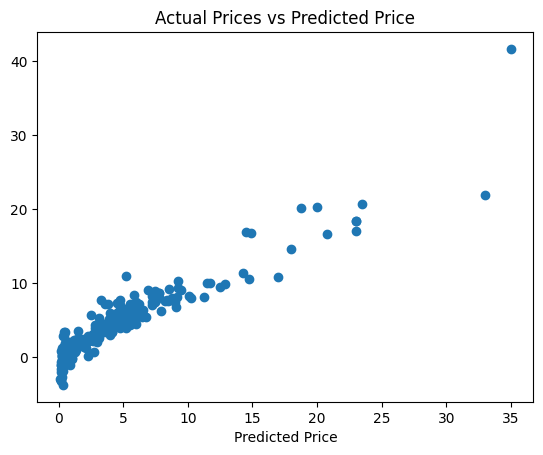

In [89]:
plt.scatter(y_train, x_train_pred)
plt.xlabel("Actual Price")
plt.xlabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")
plt.show()

In [90]:
# Find the accuracy for the testing data.
x_test_pred = model.predict(x_test)

In [93]:
#  R Squared Error 
error_score2 = metrics.r2_score(y_test, x_test_pred)
print("R Squared Error" , error_score2 * 100)

R Squared Error 84.01532365378522


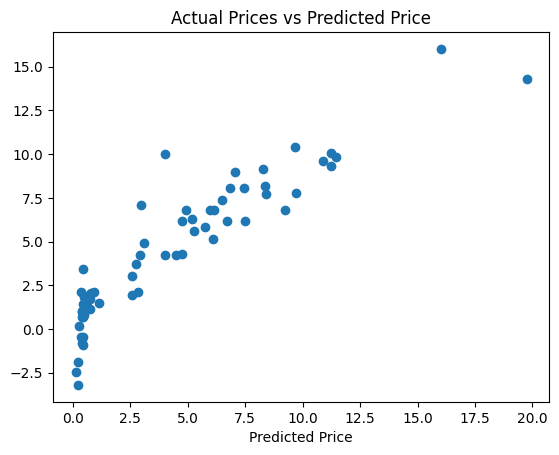

In [94]:
plt.scatter(y_test, x_test_pred)
plt.xlabel("Actual Price")
plt.xlabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")
plt.show()

## Lasso Regression Model Implementation

In [95]:
lass_model = Lasso()

In [96]:
lass_model.fit(x_train, y_train)

Lasso()

## Evaluation of the Lasso Regression Model

In [104]:
# Find the accuracy for the training data.
x_train_pred = lass_model.predict(x_train)

In [105]:
#  R Squared Error 
error_score = metrics.r2_score(y_train, x_train_pred)
print("R Squared Error" , error_score * 100)

R Squared Error 84.3587395258283


## Visualize the actual prices and predicted prices

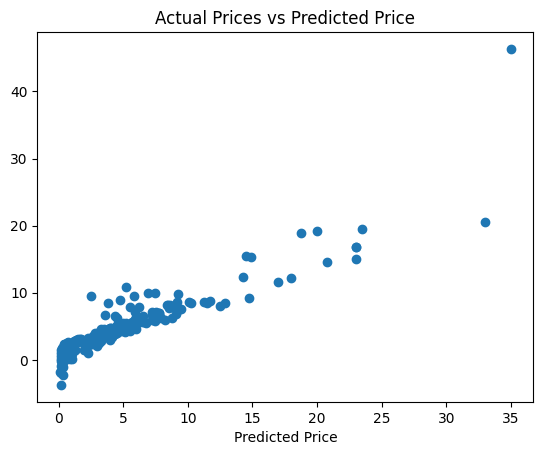

In [106]:
plt.scatter(y_train, x_train_pred)
plt.xlabel("Actual Price")
plt.xlabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")
plt.show()

In [107]:
# Find the accuracy for the testing data.
x_test_pred = lass_model.predict(x_test)

In [108]:
#  R Squared Error 
error_score2 = metrics.r2_score(y_test, x_test_pred)
print("R Squared Error" , error_score2 * 100)

R Squared Error 84.9745757073854


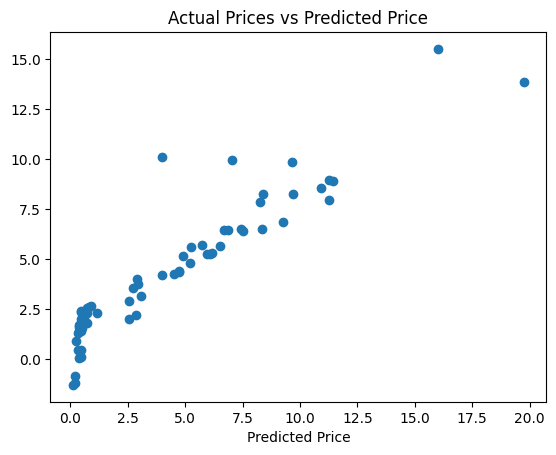

In [109]:
plt.scatter(y_test, x_test_pred)
plt.xlabel("Actual Price")
plt.xlabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")
plt.show()